In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [23]:
dfasia = pd.read_csv('Asia immigration in RO2.csv')
dfasia.head()

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,426,750,581,717,1118,1024,571,403,1750,1566
1,Japon,8,8,9,44,62,70,55,57,70,118
2,North Korea,8,2,2,7,0,4,4,6,8,0
3,South Korea,1,2,8,61,159,132,148,90,45,214
4,Mongolia,2,4,5,6,12,8,2,2,3,21


In [41]:
dfasia.index.name = None
dfasia.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
China,426,750,581,717,1118,1024,571,403,1750,1566
Japon,8,8,9,44,62,70,55,57,70,118
North Korea,8,2,2,7,0,4,4,6,8,0
South Korea,1,2,8,61,159,132,148,90,45,214
Mongolia,2,4,5,6,12,8,2,2,3,21


In [42]:
dfasia.columns.tolist()
dfasia.index.tolist()

print (type(dfasia.columns.tolist()))
print (type(dfasia.index.tolist()))

<class 'list'>
<class 'list'>


In [43]:
dfasia.columns = list(map(str, dfasia.columns))

In [44]:
years = list(map(str, range(2009, 2019)))
years

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [45]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [46]:
dfasiaT = dfasia.transpose()
dfasiaT.head()

,China,Japon,North Korea,South Korea,Mongolia,Taiwan,Brunei,Indonesia,Cambodgia,Laos,Myanmar,Malaysia,Philipp,Singapore,Thailand,Vietnam,Afghanistan,Bangladesh,India,Iran,Sri Lanka,Nepal,Pakistan,UAE,Armenia,Azerbaidjan,Bahrain,Georgia,Israel,Iraq,Jordan,Kuwait,Lebanon,Oman,Palestine,Qatar,Saudi Arabia,Syria,Yemen
2009,426,8,8,1,2,0,0,4,0,0,0,0,9,0,4,8,0,7,38,67,0,3,63,1,31,3,0,16,52,90,27,8,68,0,12,0,4,117,3
2010,750,8,2,2,4,0,0,2,0,0,0,2,4,0,0,24,3,4,44,44,2,2,42,4,6,1,0,12,59,43,13,8,62,0,7,1,0,77,1
2011,581,9,2,8,5,0,0,4,4,2,3,3,16,1,8,27,32,14,45,54,1,4,43,1,12,3,0,11,32,71,42,1,57,0,18,1,2,155,4
2012,717,44,7,61,6,2,0,12,2,0,1,5,136,1,12,41,37,119,85,94,52,47,151,0,10,14,0,24,156,105,58,0,77,3,52,0,4,515,8
2013,1118,62,0,159,12,2,0,20,0,0,7,15,165,6,23,151,39,61,138,135,25,28,390,2,57,20,4,80,467,303,116,1,171,9,88,0,18,1352,5


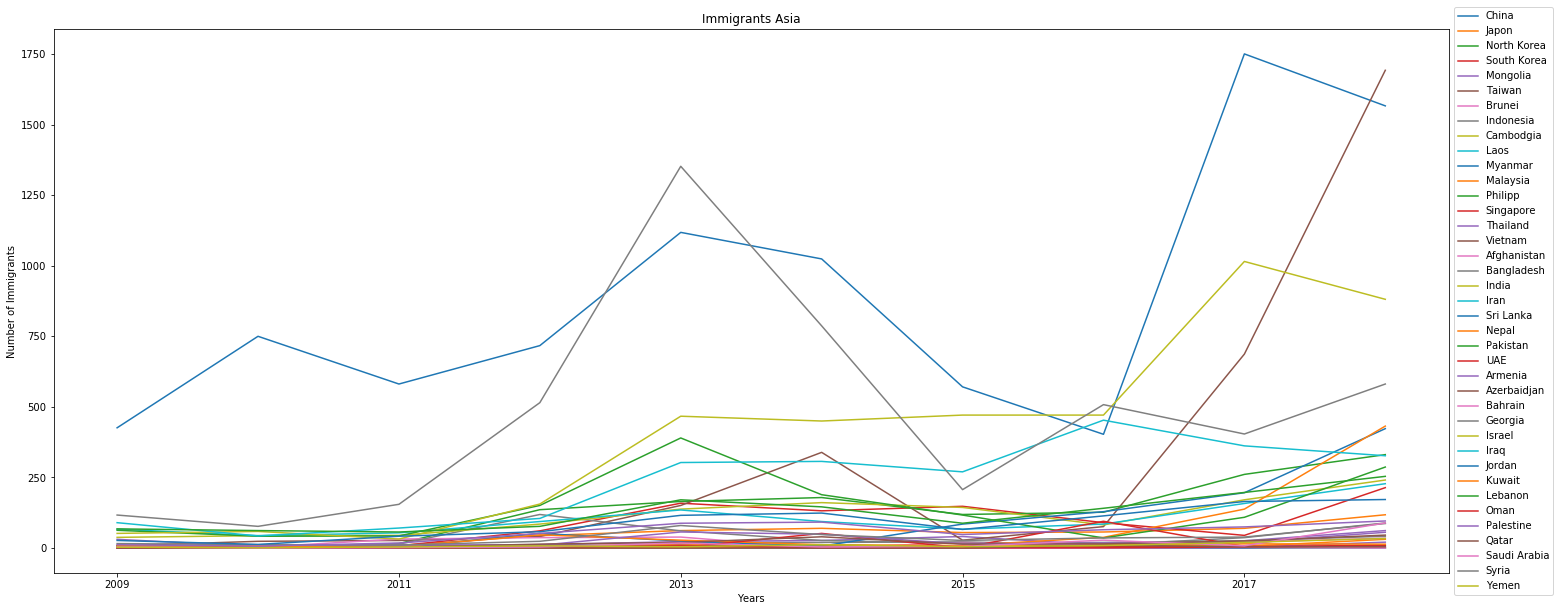

In [49]:

dfasiaT=dfasiaT.astype(int)
dfasiaT.plot(kind='line', figsize=(25, 10))
plt.title('Immigrants Asia')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [51]:
dfasia.loc[:,'Total'] = dfasia.sum(numeric_only=True, axis=1)
dfasia.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
China,426,750,581,717,1118,1024,571,403,1750,1566,7774
Japon,8,8,9,44,62,70,55,57,70,118,486
North Korea,8,2,2,7,0,4,4,6,8,0,24
South Korea,1,2,8,61,159,132,148,90,45,214,814
Mongolia,2,4,5,6,12,8,2,2,3,21,52


In [52]:
dfasia1 = dfasia.sort_values(by=['Total'], ascending = False)
dfasia1.head(6)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
China,426,750,581,717,1118,1024,571,403,1750,1566,7774
Vietnam,8,24,27,41,151,339,28,76,687,1692,4814
Israel,52,59,32,156,467,450,471,471,1015,881,4734
Syria,117,77,155,515,1352,787,207,508,404,581,2384
Iraq,90,43,71,105,303,307,270,453,362,327,1918
Philipp,9,4,16,136,165,179,119,127,261,331,1422


In [53]:
import pandas as pd
dfim = pd.read_csv('philippine immigration1.csv')
dfim

,Year,No
0,2009,9
1,2010,4
2,2011,16
3,2012,136
4,2013,165
5,2014,179
6,2015,119
7,2016,127
8,2017,261
9,2018,331


In [54]:
y = pd.factorize(dfim['No'])[0].reshape(-1, 1)

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
x = pd.factorize(dfim['Year'])[0].reshape(-1, 1)
y = dfim['No'].astype(int)
print(y)

0        9
1        4
2       16
3      136
4      165
5      179
6      119
7      127
8      261
9      331
10    1106
Name: No, dtype: int64


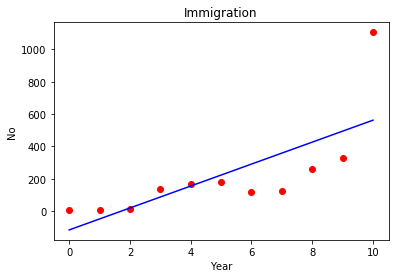

In [56]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(x, y, color='red')
    plt.plot(x, lin_reg.predict(x), color='blue')
    plt.title('Immigration')
    plt.xlabel('Year')
    plt.ylabel('No')
    plt.show()
    return
viz_linear()

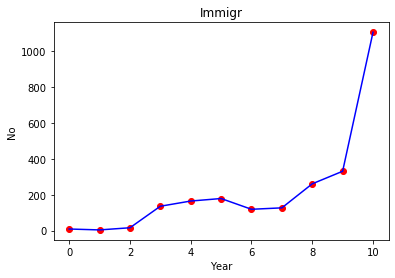

In [57]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=10)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x, y, color='red')
    plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    plt.title('Immigr')
    plt.xlabel('Year')
    plt.ylabel('No')
    plt.show()
    return
viz_polymonial()

In [58]:
lin_reg.predict([[0]])

array([-116.27272727])

In [59]:
pol_reg.predict(poly_reg.fit_transform([[10]]))

array([1105.99733838])

0.9999999999903308


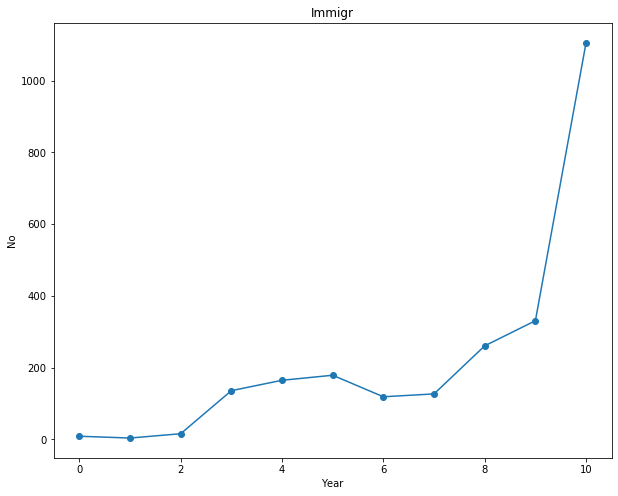

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
x_poly = poly_reg.fit_transform(x.reshape(-1, 1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)
y_pred = lin_reg_2.predict(x_poly)
plt.figure(figsize=(10,8));
plt.scatter(x, y);
plt.plot(x, y_pred);
plt.title('Immigr')
plt.xlabel('Year')
plt.ylabel('No')
print(r2_score(y, y_pred))

In [63]:
pip install fbprophet

     |████████████████████████████████| 61kB 6.1MB/s  eta 0:00:01
     |████████████████████████████████| 2.0MB 7.7MB/s eta 0:00:01
     |████████████████████████████████| 67.3MB 6.5MB/s eta 0:00:014     |██████████                      | 21.1MB 5.4MB/s eta 0:00:09     |████████████                    | 25.1MB 5.4MB/s eta 0:00:08     |████████████▉                   | 27.1MB 7.0MB/s eta 0:00:06/s eta 0:00:05:00:03��▉       | 52.2MB 7.0MB/s eta 0:00:03     |█████████████████████████▋      | 53.9MB 7.0MB/s eta 0:00:02████████████████████████▌     | 55.7MB 7.0MB/s eta 0:00:02
     |████████████████████████████████| 51kB 18.0MB/s eta 0:00:01
     |████████████████████████████████| 112kB 38.7MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 37.6MB/s eta 0:00:01
     |████████████████████████████████| 737kB 41.1MB/s eta 0:00:01
  ERROR: Complete output from command /home/jupyterlab/conda/envs/python/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-kx5

In [75]:
from fbprophet import Prophet

In [76]:
dfp = pd.read_csv('philippine immigration prophet.csv')
dfp1 = dfp.dropna(axis='columns')
dfp1.head()

,ds,y
0,12/31/2009,9
1,12/31/2010,4
2,12/31/2011,16
3,12/31/2012,136
4,12/31/2013,165


In [77]:
dfp1.dtypes

ds    object
y     object
dtype: object

In [78]:
dfp1['ds'] = pd.to_datetime(dfp1['ds'])
dfp1['y'] = dfp1['y'].astype(int)

In [79]:
dfp1.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [80]:
future = m.make_future_dataframe(periods=5, freq='Y')
future.head()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
11,2020-12-31,882.036986,689.755585,1062.329670
12,2021-12-31,1105.271906,905.544382,1288.131548
13,2022-12-31,1391.343738,1200.492714,1579.094413
14,2023-12-31,1358.169397,1174.224716,1552.529075
15,2024-12-31,2139.761373,1945.239566,2338.995757


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


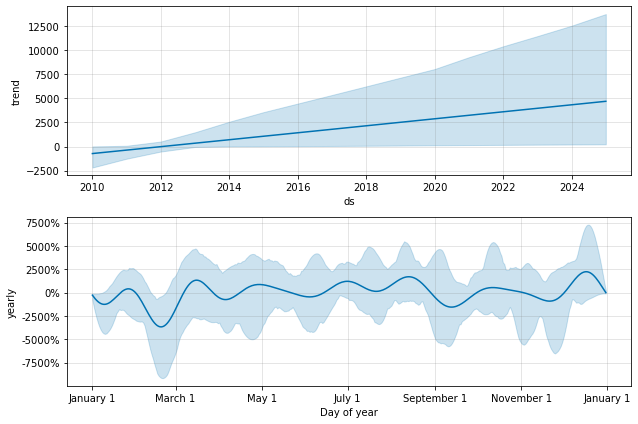

In [81]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=60).fit(dfp1)
fcst = m.predict(future)
fig = m.plot_components(fcst)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


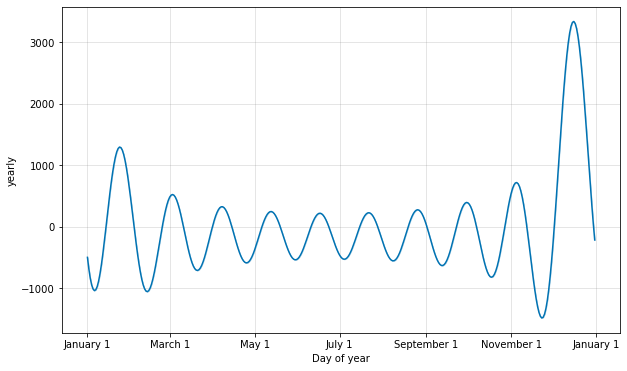

In [82]:
from fbprophet.plot import plot_yearly
m = Prophet().fit(dfp1)
a = plot_yearly(m)

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


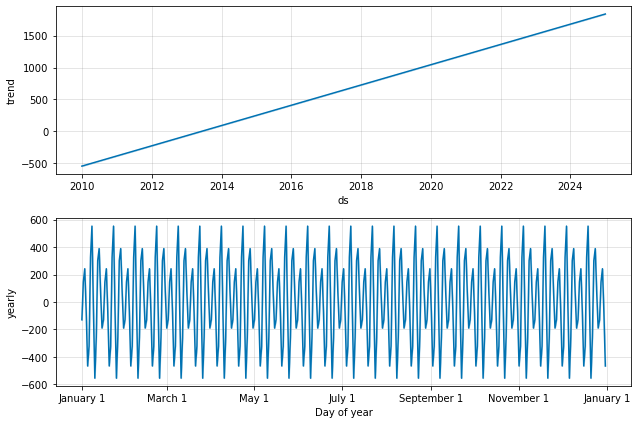

In [83]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='yearly', period=15, fourier_order=5)
forecast = m.fit(dfp1).predict(future)
fig = m.plot_components(forecast)

In [85]:
df = pd.read_csv('Bucharest districts.csv')
df.head()

,District,Latitude,Longitude
0,Sector 1,44.4918,26.0488
1,Sector 2,44.4512,26.1339
2,Sector 3,44.4230,26.1686
3,Sector 4,44.3754,26.1218
4,Sector 5,44.3877,26.0716


In [86]:
dfr = df.round(2)
dfr

,District,Latitude,Longitude
0,Sector 1,44.49,26.05
1,Sector 2,44.45,26.13
2,Sector 3,44.42,26.17
3,Sector 4,44.38,26.12
4,Sector 5,44.39,26.07
5,Sector 6,44.44,26.02


In [87]:
dfr.shape

(6, 3)

In [88]:
address = 'Bucharest, BUC'

geolocator = Nominatim(user_agent="buc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bucharest are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bucharest are 44.4780359, 26.1575922.


In [89]:
# create map of Bucharest
map_buc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map for each neighborhood
for lat, lng, neighborhood in zip(dfr['Latitude'], dfr['Longitude'], dfr['District']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_buc)  
    
map_buc

In [90]:
CLIENT_ID = 'DIN34HGUXANZKGL4DQVENYONQ4ZNEIH5CSWNFMSDV4FULKFT'
CLIENT_SECRET = 'QXJOW1B3KGKOSYYPXHEDAWZ2THFST55Y3SCXPSTVFR3ECHX2'
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DIN34HGUXANZKGL4DQVENYONQ4ZNEIH5CSWNFMSDV4FULKFT
CLIENT_SECRET:QXJOW1B3KGKOSYYPXHEDAWZ2THFST55Y3SCXPSTVFR3ECHX2


In [91]:
def getNearbyVenues(names, latitudes, longitudes, search_query = "Japanese", limit=200):
    search_query = "Japanese"
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        urlj = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            search_query, 
            limit)
            
        # make the GET request
        results = requests.get(urlj).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venuesj = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venuesj.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venuesj)

In [92]:
buc_venuesj = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Sector 1
Sector 2
Sector 3
Sector 4
Sector 5
Sector 6


In [93]:
print(buc_venuesj.shape)
buc_venuesj.head()

(96, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Yuki,44.460780,26.095195,Japanese Restaurant
1,Sector 1,44.4918,26.0488,Zen Sushi,44.481502,26.091927,Japanese Restaurant
2,Sector 1,44.4918,26.0488,Sushi ko,44.477158,26.088231,Japanese Restaurant
3,Sector 1,44.4918,26.0488,Yoshi Sushi,44.461276,26.100585,Japanese Restaurant
4,Sector 1,44.4918,26.0488,Kan Pai Bistro,44.462169,26.099197,Japanese Restaurant


In [94]:
buc_venuesj1=buc_venuesj.drop_duplicates(subset='Venue Latitude', keep='first')
buc_venuesj1.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Yuki,44.460780,26.095195,Japanese Restaurant
1,Sector 1,44.4918,26.0488,Zen Sushi,44.481502,26.091927,Japanese Restaurant
2,Sector 1,44.4918,26.0488,Sushi ko,44.477158,26.088231,Japanese Restaurant
3,Sector 1,44.4918,26.0488,Yoshi Sushi,44.461276,26.100585,Japanese Restaurant
4,Sector 1,44.4918,26.0488,Kan Pai Bistro,44.462169,26.099197,Japanese Restaurant


In [95]:
def getNearbyVenues(names, latitudes, longitudes, search_queryc = "Chinese", limit=200):
    search_query = "Chinese"
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        urlc = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            search_queryc, 
            limit)
            
        # make the GET request
        results = requests.get(urlc).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venuesc = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venuesc.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venuesc)


In [96]:
buc_venuesc = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Sector 1
Sector 2
Sector 3
Sector 4
Sector 5
Sector 6


In [97]:
print(buc_venuesc.shape)
buc_venuesc.head()

(169, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Chopstix,44.506181,26.088821,Chinese Restaurant
1,Sector 1,44.4918,26.0488,Beijing Garden,44.442366,26.081012,Chinese Restaurant
2,Sector 1,44.4918,26.0488,Nan Jing,44.449530,26.091463,Chinese Restaurant
3,Sector 1,44.4918,26.0488,Kungfu King,44.452347,26.081237,Chinese Restaurant
4,Sector 1,44.4918,26.0488,Restaurant Hong Kong,44.445375,26.084078,Chinese Restaurant


In [98]:
buc_venuesc1=buc_venuesc.drop_duplicates(subset='Venue Latitude', keep='first')
buc_venuesc1.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Chopstix,44.506181,26.088821,Chinese Restaurant
1,Sector 1,44.4918,26.0488,Beijing Garden,44.442366,26.081012,Chinese Restaurant
2,Sector 1,44.4918,26.0488,Nan Jing,44.449530,26.091463,Chinese Restaurant
3,Sector 1,44.4918,26.0488,Kungfu King,44.452347,26.081237,Chinese Restaurant
4,Sector 1,44.4918,26.0488,Restaurant Hong Kong,44.445375,26.084078,Chinese Restaurant


In [99]:
def getNearbyVenues(names, latitudes, longitudes, search_queryt = "Thai", limit=200):
    search_query = "Thai"
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        urlt = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            search_queryt, 
            limit)
            
        # make the GET request
        results = requests.get(urlt).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venuest = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venuest.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venuest)
buc_venuest = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
print(buc_venuest.shape)
buc_venuest.head()

Sector 1
Sector 2
Sector 3
Sector 4
Sector 5
Sector 6
(52, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Kunnai,44.464912,26.060807,Thai Restaurant
1,Sector 1,44.4918,26.0488,tuk tuk. eat asia (tuk tuk - thai urban kitchen),44.460871,26.096383,Thai Restaurant
2,Sector 1,44.4918,26.0488,Barka Saffron,44.465726,26.068011,Thai Restaurant
3,Sector 1,44.4918,26.0488,Container - Food for Home Office Street,44.449755,26.083501,Food Truck
4,Sector 1,44.4918,26.0488,Wok Away,44.461980,26.101307,Asian Restaurant


In [100]:
buc_venuest1=buc_venuest.drop_duplicates(subset='Venue Latitude', keep='first')
buc_venuest1.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Kunnai,44.464912,26.060807,Thai Restaurant
1,Sector 1,44.4918,26.0488,tuk tuk. eat asia (tuk tuk - thai urban kitchen),44.460871,26.096383,Thai Restaurant
2,Sector 1,44.4918,26.0488,Barka Saffron,44.465726,26.068011,Thai Restaurant
3,Sector 1,44.4918,26.0488,Container - Food for Home Office Street,44.449755,26.083501,Food Truck
4,Sector 1,44.4918,26.0488,Wok Away,44.461980,26.101307,Asian Restaurant


In [101]:
def getNearbyVenues(names, latitudes, longitudes, search_query = "Vietnamese", limit=200):
    search_query = "Vietnamese"
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        urlv = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            search_query, 
            limit)
            
        # make the GET request
        results = requests.get(urlv).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venuesv = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venuesv.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venuesv)
buc_venuesv = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
print(buc_venuesv.shape)
buc_venuesv.head()

Sector 1
Sector 2
Sector 3
Sector 4
Sector 5
Sector 6
(60, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Toàn's,44.478370,26.103411,Vietnamese Restaurant
1,Sector 1,44.4918,26.0488,Toàn's,44.510430,26.086636,Vietnamese Restaurant
2,Sector 1,44.4918,26.0488,Toàn's,44.442241,26.098978,Vietnamese Restaurant
3,Sector 1,44.4918,26.0488,Li-Wu,44.431223,26.103542,Vietnamese Restaurant
4,Sector 1,44.4918,26.0488,Thang Long,44.421799,26.107493,Vietnamese Restaurant


In [102]:
buc_venuesv1=buc_venuesv.drop_duplicates(subset='Venue Latitude', keep='first')
buc_venuesv1.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Toàn's,44.478370,26.103411,Vietnamese Restaurant
1,Sector 1,44.4918,26.0488,Toàn's,44.510430,26.086636,Vietnamese Restaurant
2,Sector 1,44.4918,26.0488,Toàn's,44.442241,26.098978,Vietnamese Restaurant
3,Sector 1,44.4918,26.0488,Li-Wu,44.431223,26.103542,Vietnamese Restaurant
4,Sector 1,44.4918,26.0488,Thang Long,44.421799,26.107493,Vietnamese Restaurant


In [103]:
def getNearbyVenues(names, latitudes, longitudes, search_query = "Filipino", limit=200):
    search_query = "Filipino"
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        urlf = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            search_query, 
            limit)
            
        # make the GET request
        results = requests.get(urlf).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venuesf = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venuesf.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venuesf)
buc_venuesf = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
print(buc_venuesf.shape)
buc_venuesf.head()

Sector 1
Sector 2
Sector 3
Sector 4
Sector 5
Sector 6
(4, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Santiago Kitchen,44.540455,26.141832,Filipino Restaurant
1,Sector 3,44.4230,26.1686,Santiago Kitchen,44.540455,26.141832,Filipino Restaurant
2,Sector 4,44.3754,26.1218,Santiago Kitchen,44.540455,26.141832,Filipino Restaurant
3,Sector 5,44.3877,26.0716,Santiago Kitchen,44.540455,26.141832,Filipino Restaurant


In [104]:
buc_venuesf1=buc_venuesf.drop_duplicates(subset='Venue Latitude', keep='first')
buc_venuesf1.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sector 1,44.4918,26.0488,Santiago Kitchen,44.540455,26.141832,Filipino Restaurant


In [105]:
dftot = buc_venuesj1.append([buc_venuesc1,buc_venuest1,buc_venuesv1,buc_venuesf1],ignore_index=True)
dftot.tail()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
104,Sector 1,44.4918,26.0488,Toan's,44.490178,26.127282,Vietnamese Restaurant
105,Sector 1,44.4918,26.0488,LI-WU,44.452977,26.106308,Vietnamese Restaurant
106,Sector 1,44.4918,26.0488,LI-WU,44.395619,26.122973,Vietnamese Restaurant
107,Sector 1,44.4918,26.0488,Toàn's,44.433372,26.100721,Vietnamese Restaurant
108,Sector 1,44.4918,26.0488,Santiago Kitchen,44.540455,26.141832,Filipino Restaurant


In [106]:
dfgr1 = dftot.groupby(['District', 'Venue Category']).size()
dfgr1

District  Venue Category       
Sector 1  Asian Restaurant          3
          Buffet                    1
          Chinese Restaurant       21
          Cocktail Bar              1
          Dim Sum Restaurant        1
          Filipino Restaurant       1
          Food Truck                1
          Japanese Restaurant      10
          Pub                       1
          Seafood Restaurant        1
          Steakhouse                1
          Sushi Restaurant         11
          Thai Restaurant           4
          Vietnamese Restaurant    10
Sector 2  Café                      1
          Chinese Restaurant       10
          Coffee Shop               1
          Japanese Restaurant       1
          Ramen Restaurant          1
          Restaurant                2
          Sushi Restaurant          3
Sector 3  Cantonese Restaurant      1
          Chinese Restaurant       11
Sector 4  Asian Restaurant          1
          Bar                       1
          Chinese 

In [107]:
dfgroup = dftot.groupby('District').count()
dfgroup

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Sector 1,67,67,67,67,67,67
Sector 2,19,19,19,19,19,19
Sector 3,12,12,12,12,12,12
Sector 4,10,10,10,10,10,10
Sector 6,1,1,1,1,1,1


In [108]:
buc_onehot = pd.get_dummies(dftot[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
buc_onehot['District'] = dftot['District'] 

# move neighborhood column to the first column
fixed_columns = [buc_onehot.columns[-1]] + list(buc_onehot.columns[:-1])
buc_onehot = buc_onehot[fixed_columns]

buc_onehot.head()

,District,Asian Restaurant,Bar,Buffet,Café,Cantonese Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Dim Sum Restaurant,Filipino Restaurant,Food Truck,Japanese Restaurant,Pub,Ramen Restaurant,Restaurant,Seafood Restaurant,Steakhouse,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant
0,Sector 1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Sector 1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Sector 1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Sector 1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Sector 1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [109]:
buc_grouped = buc_onehot.groupby('District').mean().reset_index()
buc_grouped

,District,Asian Restaurant,Bar,Buffet,Café,Cantonese Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Dim Sum Restaurant,Filipino Restaurant,Food Truck,Japanese Restaurant,Pub,Ramen Restaurant,Restaurant,Seafood Restaurant,Steakhouse,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant
0,Sector 1,0.044776,0.0,0.014925,0.000000,0.000000,0.313433,0.014925,0.000000,0.014925,0.014925,0.014925,0.149254,0.014925,0.000000,0.000000,0.014925,0.014925,0.164179,0.059701,0.149254
1,Sector 2,0.000000,0.0,0.000000,0.052632,0.000000,0.526316,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.105263,0.000000,0.000000,0.157895,0.000000,0.000000
2,Sector 3,0.000000,0.0,0.000000,0.000000,0.083333,0.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Sector 4,0.100000,0.1,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.100000,0.000000,0.000000
4,Sector 6,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [110]:
for hood in buc_grouped['District']:
    print("----"+hood+"----")
    temp = buc_grouped[buc_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head())
    print('\n')

----Sector 1----
                   venue  freq
0     Chinese Restaurant  0.31
1       Sushi Restaurant  0.16
2  Vietnamese Restaurant  0.15
3    Japanese Restaurant  0.15
4        Thai Restaurant  0.06


----Sector 2----
                venue  freq
0  Chinese Restaurant  0.53
1    Sushi Restaurant  0.16
2          Restaurant  0.11
3                Café  0.05
4         Coffee Shop  0.05


----Sector 3----
                  venue  freq
0    Chinese Restaurant  0.92
1  Cantonese Restaurant  0.08
2      Asian Restaurant  0.00
3   Japanese Restaurant  0.00
4       Thai Restaurant  0.00


----Sector 4----
                 venue  freq
0   Chinese Restaurant   0.3
1  Japanese Restaurant   0.2
2           Restaurant   0.2
3     Asian Restaurant   0.1
4     Sushi Restaurant   0.1


----Sector 6----
                 venue  freq
0   Chinese Restaurant   1.0
1     Asian Restaurant   0.0
2  Japanese Restaurant   0.0
3      Thai Restaurant   0.0
4     Sushi Restaurant   0.0




In [111]:
def return_most_common_venues(row):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [112]:
num_top_venues = 20
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = buc_grouped['District']

for ind in np.arange(buc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(buc_grouped.iloc[ind, :])

neighborhoods_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Sector 1,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Pub,Food Truck,Seafood Restaurant,Dim Sum Restaurant,Cocktail Bar,Steakhouse,Buffet,Filipino Restaurant,Ramen Restaurant,Restaurant,Coffee Shop,Cantonese Restaurant,Café,Bar
1,Sector 2,Chinese Restaurant,Sushi Restaurant,Restaurant,Coffee Shop,Ramen Restaurant,Café,Japanese Restaurant,Vietnamese Restaurant,Bar,Buffet,Cantonese Restaurant,Cocktail Bar,Filipino Restaurant,Dim Sum Restaurant,Thai Restaurant,Food Truck,Pub,Seafood Restaurant,Steakhouse,Asian Restaurant
2,Sector 3,Chinese Restaurant,Cantonese Restaurant,Vietnamese Restaurant,Thai Restaurant,Bar,Buffet,Café,Cocktail Bar,Coffee Shop,Dim Sum Restaurant,Filipino Restaurant,Food Truck,Japanese Restaurant,Pub,Ramen Restaurant,Restaurant,Seafood Restaurant,Steakhouse,Sushi Restaurant,Asian Restaurant
3,Sector 4,Chinese Restaurant,Restaurant,Japanese Restaurant,Asian Restaurant,Sushi Restaurant,Bar,Coffee Shop,Buffet,Café,Cantonese Restaurant,Cocktail Bar,Vietnamese Restaurant,Dim Sum Restaurant,Thai Restaurant,Food Truck,Pub,Ramen Restaurant,Seafood Restaurant,Steakhouse,Filipino Restaurant
4,Sector 6,Chinese Restaurant,Vietnamese Restaurant,Thai Restaurant,Bar,Buffet,Café,Cantonese Restaurant,Cocktail Bar,Coffee Shop,Dim Sum Restaurant,Filipino Restaurant,Food Truck,Japanese Restaurant,Pub,Ramen Restaurant,Restaurant,Seafood Restaurant,Steakhouse,Sushi Restaurant,Asian Restaurant


In [113]:
# set number of clusters
kclusters = 5

buc_grouped_clustering = buc_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(buc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 4, 1, 0], dtype=int32)

In [114]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

buc_merged = dftot

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
buc_merged = buc_merged.join(neighborhoods_venues_sorted.set_index('District'), on='District')

buc_merged.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Sector 1,44.4918,26.0488,Yuki,44.460780,26.095195,Japanese Restaurant,3,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Pub,Food Truck,Seafood Restaurant,Dim Sum Restaurant,Cocktail Bar,Steakhouse,Buffet,Filipino Restaurant,Ramen Restaurant,Restaurant,Coffee Shop,Cantonese Restaurant,Café,Bar
1,Sector 1,44.4918,26.0488,Zen Sushi,44.481502,26.091927,Japanese Restaurant,3,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Pub,Food Truck,Seafood Restaurant,Dim Sum Restaurant,Cocktail Bar,Steakhouse,Buffet,Filipino Restaurant,Ramen Restaurant,Restaurant,Coffee Shop,Cantonese Restaurant,Café,Bar
2,Sector 1,44.4918,26.0488,Sushi ko,44.477158,26.088231,Japanese Restaurant,3,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Pub,Food Truck,Seafood Restaurant,Dim Sum Restaurant,Cocktail Bar,Steakhouse,Buffet,Filipino Restaurant,Ramen Restaurant,Restaurant,Coffee Shop,Cantonese Restaurant,Café,Bar
3,Sector 1,44.4918,26.0488,Yoshi Sushi,44.461276,26.100585,Japanese Restaurant,3,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Pub,Food Truck,Seafood Restaurant,Dim Sum Restaurant,Cocktail Bar,Steakhouse,Buffet,Filipino Restaurant,Ramen Restaurant,Restaurant,Coffee Shop,Cantonese Restaurant,Café,Bar
4,Sector 1,44.4918,26.0488,Kan Pai Bistro,44.462169,26.099197,Japanese Restaurant,3,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Pub,Food Truck,Seafood Restaurant,Dim Sum Restaurant,Cocktail Bar,Steakhouse,Buffet,Filipino Restaurant,Ramen Restaurant,Restaurant,Coffee Shop,Cantonese Restaurant,Café,Bar


In [115]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(buc_merged['Venue Latitude'], buc_merged['Venue Longitude'], buc_merged['Venue Category'], buc_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters